# Importing Libraries

In [11]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

# Reading dataset

In [12]:
df = pd.read_csv('used_cars_data.csv')

# Data pre-processing

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7253 entries, 0 to 7252
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   S.No.              7253 non-null   int64  
 1   Name               7253 non-null   object 
 2   Location           7253 non-null   object 
 3   Year               7253 non-null   int64  
 4   Kilometers_Driven  7253 non-null   int64  
 5   Fuel_Type          7253 non-null   object 
 6   Transmission       7253 non-null   object 
 7   Owner_Type         7253 non-null   object 
 8   Mileage            7251 non-null   object 
 9   Engine             7207 non-null   object 
 10  Power              7207 non-null   object 
 11  Seats              7200 non-null   float64
 12  New_Price          1006 non-null   object 
 13  Price              6019 non-null   float64
dtypes: float64(2), int64(3), object(9)
memory usage: 793.4+ KB


In [14]:
df['Power'].replace (to_replace = {'null bhp': '74 bhp','nan':'74 bhp'},inplace = True)

In [15]:
df['Power'] = pd.to_numeric(df['Power'].str.split().str.get(0))

In [16]:
df['Power']

0        58.16
1       126.20
2        88.70
3        88.76
4       140.80
         ...  
7248    103.60
7249    103.60
7250     63.10
7251    103.60
7252    170.00
Name: Power, Length: 7253, dtype: float64

In [17]:
df['Mileage'] = pd.to_numeric(df['Mileage'].str.split().str.get(0))

In [18]:
df['Engine'] = pd.to_numeric(df['Engine'].str.split().str.get(0))

# Missing value treatment

In [19]:
df['Engine'] = df['Engine'].fillna(value = df['Engine'].median())
df['Power'] = df['Power'].fillna(value = df['Power'].median())
df['Seats'] = df['Seats'].fillna(value = df['Seats'].median())

In [20]:
df['Price'] = df['Price'].fillna(value = df['Price'].median())

# Dropping unnecessary columns

In [21]:
df.drop('New_Price',axis=1, inplace = True)

In [22]:
df.dropna(inplace=True)

In [23]:
df.isnull().sum()

S.No.                0
Name                 0
Location             0
Year                 0
Kilometers_Driven    0
Fuel_Type            0
Transmission         0
Owner_Type           0
Mileage              0
Engine               0
Power                0
Seats                0
Price                0
dtype: int64

# Checking co-relation

<AxesSubplot:>

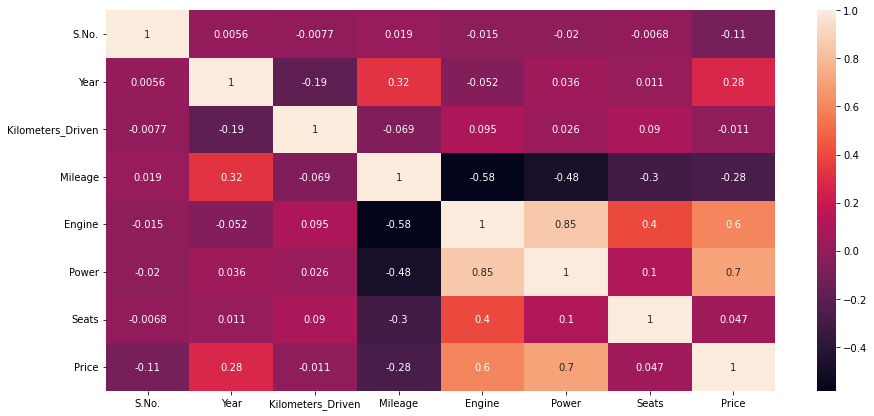

In [24]:
plt.figure(figsize = (15,7))
sns.heatmap(df.corr(),annot=True)

In [25]:
df.drop('Engine',axis=1,inplace=True)

In [26]:
df.drop('S.No.',axis=1,inplace=True)

In [27]:
df.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Power,Seats,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.60,58.16,5.0,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,126.20,5.0,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.20,88.70,5.0,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,88.76,7.0,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,140.80,5.0,17.74


In [28]:
df['Name'].nunique()

2039

In [29]:
df['Location'].unique()

array(['Mumbai', 'Pune', 'Chennai', 'Coimbatore', 'Hyderabad', 'Jaipur',
       'Kochi', 'Kolkata', 'Delhi', 'Bangalore', 'Ahmedabad'],
      dtype=object)

In [30]:
df['Fuel_Type'].unique()

array(['CNG', 'Diesel', 'Petrol', 'LPG'], dtype=object)

In [31]:
df['Transmission'].unique()

array(['Manual', 'Automatic'], dtype=object)

In [32]:
df['Owner_Type'].unique()

array(['First', 'Second', 'Fourth & Above', 'Third'], dtype=object)

In [33]:
df['Company'] = df['Name'].apply(lambda x:x.split()[0].capitalize())

In [34]:
df.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Power,Seats,Price,Company
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.60,58.16,5.0,1.75,Maruti
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,126.20,5.0,12.50,Hyundai
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.20,88.70,5.0,4.50,Honda
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,88.76,7.0,6.00,Maruti
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,140.80,5.0,17.74,Audi


In [35]:
df['Company'].nunique()

32

In [36]:
df.drop('Name',axis=1,inplace=True)

In [37]:
df

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Power,Seats,Price,Company
0,Mumbai,2010,72000,CNG,Manual,First,26.60,58.16,5.0,1.75,Maruti
1,Pune,2015,41000,Diesel,Manual,First,19.67,126.20,5.0,12.50,Hyundai
2,Chennai,2011,46000,Petrol,Manual,First,18.20,88.70,5.0,4.50,Honda
3,Chennai,2012,87000,Diesel,Manual,First,20.77,88.76,7.0,6.00,Maruti
4,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,140.80,5.0,17.74,Audi
...,...,...,...,...,...,...,...,...,...,...,...
7248,Hyderabad,2011,89411,Diesel,Manual,First,20.54,103.60,5.0,5.64,Volkswagen
7249,Mumbai,2015,59000,Petrol,Automatic,First,17.21,103.60,5.0,5.64,Volkswagen
7250,Kolkata,2012,28000,Diesel,Manual,First,23.08,63.10,5.0,5.64,Nissan
7251,Pune,2013,52262,Petrol,Automatic,Third,17.20,103.60,5.0,5.64,Volkswagen


# Categorical to numberic convertion

In [38]:
df = pd.get_dummies(df,drop_first=True)

In [39]:
df.head()

,Year,Kilometers_Driven,Mileage,Power,Seats,Price,Location_Bangalore,Location_Chennai,Location_Coimbatore,Location_Delhi,...,Company_Nissan,Company_Opelcorsa,Company_Porsche,Company_Renault,Company_Skoda,Company_Smart,Company_Tata,Company_Toyota,Company_Volkswagen,Company_Volvo
0,2010,72000,26.60,58.16,5.0,1.75,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2015,41000,19.67,126.20,5.0,12.50,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2011,46000,18.20,88.70,5.0,4.50,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2012,87000,20.77,88.76,7.0,6.00,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2013,40670,15.20,140.80,5.0,17.74,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [40]:
len(df.columns)

54

In [41]:
# split in x and y 
# train and test split 
# Linear regression 
#  performance (MAE, MSC, RMSCE, R square, adj R square)

data download + EDA (pandas + visualization) + data preprocessing + missing values + missing values treatment + correlation + feature engineering (new column,'comp') + cat to num conversion + feature selection + split x (independent col) and y (target col) + 70 and 30 train test split + model creation + evaluation 

# x and y split 

In [42]:
x = df.drop('Price',axis=1)
y = df['Price']

# Train and Test Split

In [43]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=100)

In [44]:
x_train.head()

,Year,Kilometers_Driven,Mileage,Power,Seats,Location_Bangalore,Location_Chennai,Location_Coimbatore,Location_Delhi,Location_Hyderabad,...,Company_Nissan,Company_Opelcorsa,Company_Porsche,Company_Renault,Company_Skoda,Company_Smart,Company_Tata,Company_Toyota,Company_Volkswagen,Company_Volvo
6966,2009,49000,18.48,177.00,5.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2633,2014,48104,17.40,117.30,5.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6523,2013,54000,19.33,138.03,5.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
6452,2014,75000,21.21,103.20,5.0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
1725,2017,5500,21.56,103.25,5.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


#  Feature Scalling
1. Min Max scaller 
2. Standard Scaller

In [45]:
from sklearn.preprocessing import MinMaxScaler 
scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

# Model Building

In [46]:
from sklearn.linear_model import LinearRegression
lr= LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [47]:
lr.score(x_train,y_train)*100

63.665053378068095

In [48]:
from sklearn.preprocessing import PolynomialFeatures 
poly_reg = PolynomialFeatures()
x_poly = poly_reg.fit_transform(x_train)
p_reg = LinearRegression()
p_reg.fit(x_poly,y_train)
print('Polynomial Model Score', p_reg.score(x_poly,y_train)*100)

Polynomial Model Score 81.46634255247386


# Evaluating Model's Performance 

In [49]:
from sklearn import metrics 
y_pred = lr.predict(x_test)
MAE = metrics.mean_absolute_error(y_test,y_pred)
MSE = metrics.mean_squared_error(y_test,y_pred)
RMSE = np.sqrt(MSE)
R_squared_value = metrics.r2_score(y_test,y_pred)


# Adjusted R square value

In [50]:
P = int(len(df.columns)-1)
N = int(len(df))
Adj_R_squared_Value =1 - ((1-R_squared_value)*(N - 1)/(N-P-1))

In [51]:
Adj_R_squared_Value

0.6722210157735959

In [52]:
MAE

3.15336900592843

In [53]:
MSE

35.81020646052567

In [54]:
RMSE

5.984162970752524

In [55]:
R_squared_value

0.6746171931755269